# **Visualizing employee satisfaction comparisons in Python**

## Overview

This project served as the capstone of my Google Advanced Data Analytics Certificate (2024) and here is a cleaned up, modified representation of the Jupyter notebook file. 

The goal of with this project is to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

This is the complete code notebook for analyzing employee data for Salifort Motors, looking specifically at why the turnover rate is so high, looking to compare variables to find correlations to shed some light on the situation and potential ways to raise over satisfaction scores and ultimately retain more employees.

Relevent Python packages: numpy, Pandas, Scipy, seaborn, Matplotlib, statsmodels, scikit-learn

### The HR dataset

15,000 rows and 10 columns:

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

## Step 1. Imports

### Import packages

In [1]:
# Import packages
    # standard operational package imports (numberics/dataframes)
import numpy as np
import pandas as pd

    # important imports for preprocessing, modeling, and evaluation
        # Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install statsmodels
!{sys.executable} -m pip install scikit-learn
!{sys.executable} -m pip install xgboost
!{sys.executable} -m pip install seaborn
!{sys.executable} -m pip install plotly

import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.preprocessing import OneHotEncoder as ohe
from sklearn.model_selection import train_test_split as tts
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression as lr
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance
    # this module lets us save our models once we fit them
import pickle

    # visualization package imports
import matplotlib.pyplot as plt  # basic viz
import seaborn as sns  # statistical viz
import plotly.express as px  # presentations/publications viz

### Load dataset

In [4]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [5]:
# Gather basic information about the data
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [6]:
# Gather descriptive statistics about the data
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

In [7]:
# Display all column names
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [8]:
# Rename columns as needed
df0 = df0.rename(columns={'last_evaluation':'last_eval_score',
                          'number_project':'projects',
                          'average_montly_hours':'avg_monthly_hours',
                          'time_spend_company':'tenure',
                          'Work_accident':'work_accident',
                          'promotion_last_5years':'promotion_last_5yrs',
                          'Department':'department'})

# Display all column names after the update
df0.columns

Index(['satisfaction_level', 'last_eval_score', 'projects',
       'avg_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5yrs', 'department', 'salary'],
      dtype='object')

### Check missing values

In [9]:
# Check for missing values
df0.isna().sum()

satisfaction_level     0
last_eval_score        0
projects               0
avg_monthly_hours      0
tenure                 0
work_accident          0
left                   0
promotion_last_5yrs    0
department             0
salary                 0
dtype: int64

### Check duplicates

In [10]:
# Check for duplicates
df0.duplicated().sum()

3008

In [11]:
# Inspect some rows containing duplicates as needed
df0[df0.duplicated() == True]

,satisfaction_level,last_eval_score,projects,avg_monthly_hours,tenure,work_accident,left,promotion_last_5yrs,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [12]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df = df0.drop_duplicates()

# Display first few rows of new dataframe as needed
df.head()

,satisfaction_level,last_eval_score,projects,avg_monthly_hours,tenure,work_accident,left,promotion_last_5yrs,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

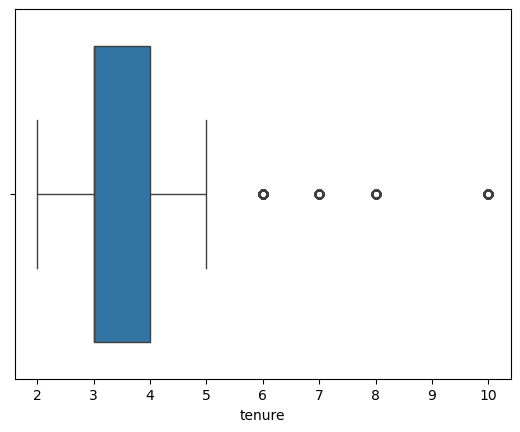

In [23]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
g = sns.boxplot(data=df, x='tenure', showfliers=True)

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [24]:
df.head()

,satisfaction_level,last_eval_score,projects,avg_monthly_hours,tenure,work_accident,left,promotion_last_5yrs,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [25]:
# Get numbers of people who left vs. stayed
print(df['left'].value_counts())
# Get percentages of people who left vs. stayed
print(df['left'].value_counts(normalize=True))

left
0    10000
1     1991
Name: count, dtype: int64
left
0    0.833959
1    0.166041
Name: proportion, dtype: float64


### Data visualizations

In [26]:
df.head(10)

,satisfaction_level,last_eval_score,projects,avg_monthly_hours,tenure,work_accident,left,promotion_last_5yrs,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [27]:
df['department'].value_counts()

department
sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: count, dtype: int64

In [30]:
pd.options.mode.chained_assignment = None
df['department_numbers'] = df['department'].astype('category').cat.codes

In [31]:
df['department_numbers'].value_counts()

department_numbers
7    3239
9    2244
8    1821
0     976
1     694
6     686
5     673
2     621
3     601
4     436
Name: count, dtype: int64

In [32]:
df['salary'].value_counts()

salary
low       5740
medium    5261
high       990
Name: count, dtype: int64

In [33]:
dict = {'low':1, 'medium':2, 'high':3}
df['salary_numbers'] = df['salary'].replace(dict)

In [34]:
df_num = df.drop(columns=['salary', 'department'])

In [35]:
df_num.head()

,satisfaction_level,last_eval_score,projects,avg_monthly_hours,tenure,work_accident,left,promotion_last_5yrs,department_numbers,salary_numbers
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1


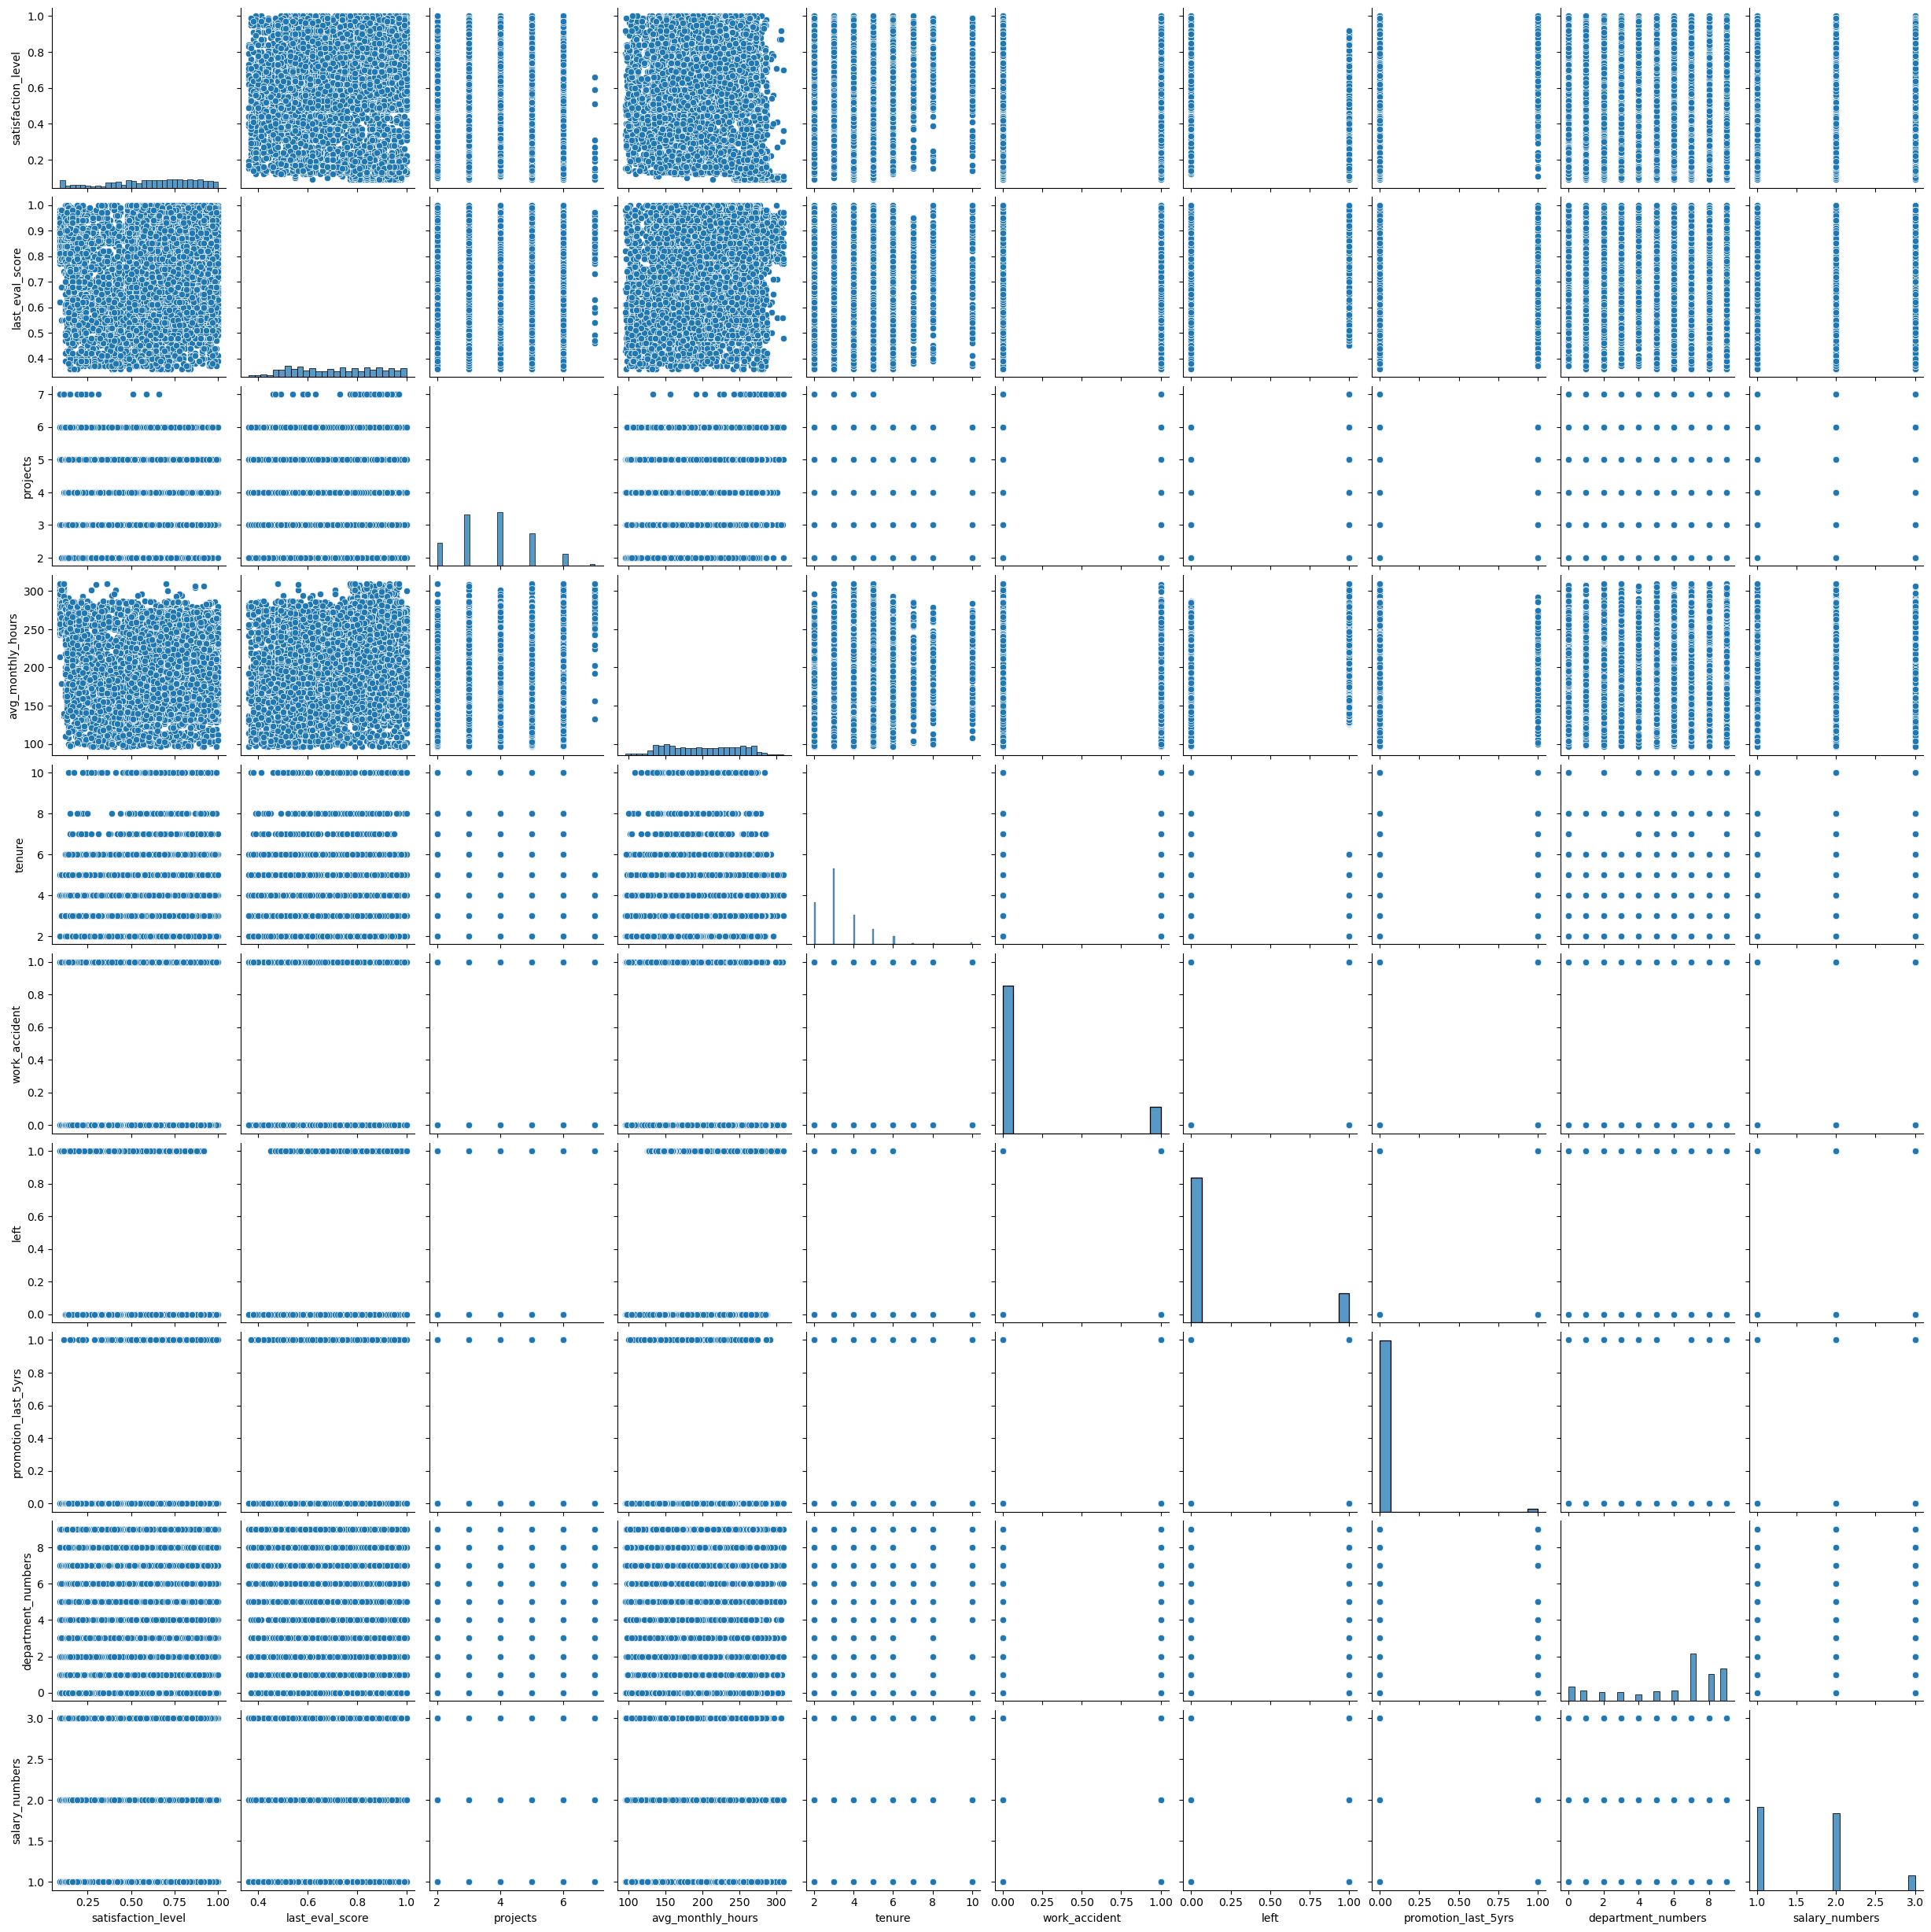

In [36]:
# pairplot
sns.pairplot(df_num)

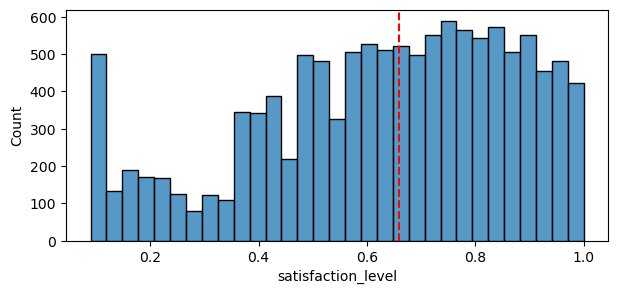

In [37]:
# histogram: satisfaction level across the board
plt.figure(figsize=(7,3))
sns.histplot(x=df_num['satisfaction_level'])
median = df_num['satisfaction_level'].median()
plt.axvline(median, color='red', linestyle='--')

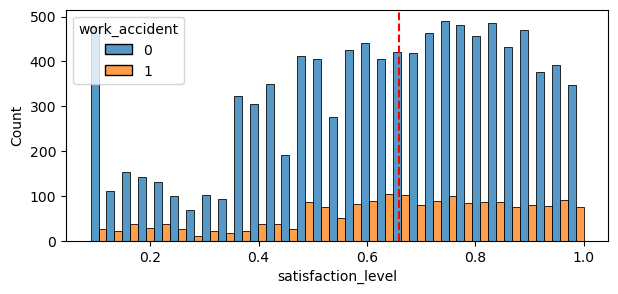

In [38]:
# histogram: satisfaction level if had a work accident
plt.figure(figsize=(7,3))
sns.histplot(x=df_num['satisfaction_level'], hue=df_num['work_accident'], multiple='dodge')
median = df_num['satisfaction_level'].median()
plt.axvline(median, color='red', linestyle='--')

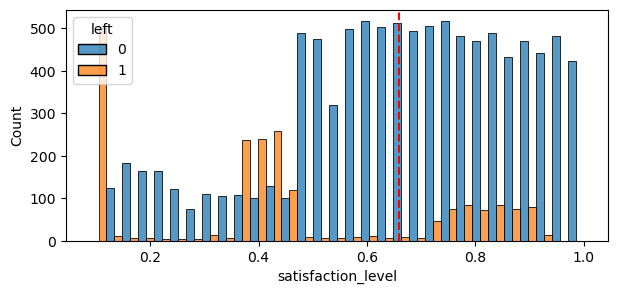

In [39]:
# histogram: satisfaction level if left
plt.figure(figsize=(7,3))
sns.histplot(x=df_num['satisfaction_level'], hue=df_num['left'], multiple='dodge')
median = df_num['satisfaction_level'].median()
plt.axvline(median, color='red', linestyle='--')

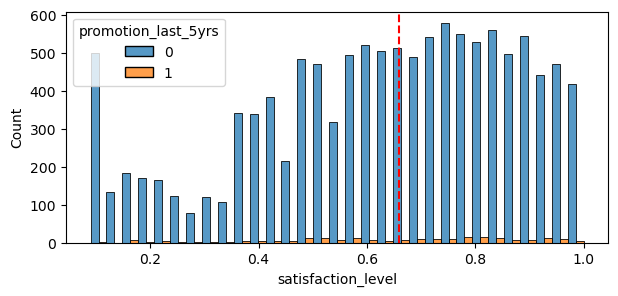

In [40]:
# histogram: satisfaction level if promotion in last 5 years
plt.figure(figsize=(7,3))
sns.histplot(x=df_num['satisfaction_level'], hue=df_num['promotion_last_5yrs'], multiple='dodge')
median = df_num['satisfaction_level'].median()
plt.axvline(median, color='red', linestyle='--')

In [41]:
df_num['promotion_last_5yrs'].value_counts(normalize=True)

promotion_last_5yrs
0    0.983071
1    0.016929
Name: proportion, dtype: float64

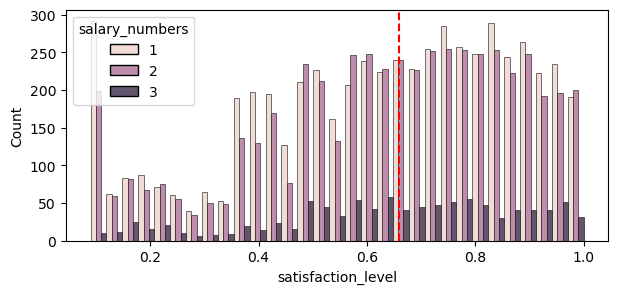

In [42]:
# histogram: satisfaction level by salary (low, medium, high)
plt.figure(figsize=(7,3))
sns.histplot(x=df_num['satisfaction_level'], hue=df_num['salary_numbers'], multiple='dodge')
median = df_num['satisfaction_level'].median()
plt.axvline(median, color='red', linestyle='--')

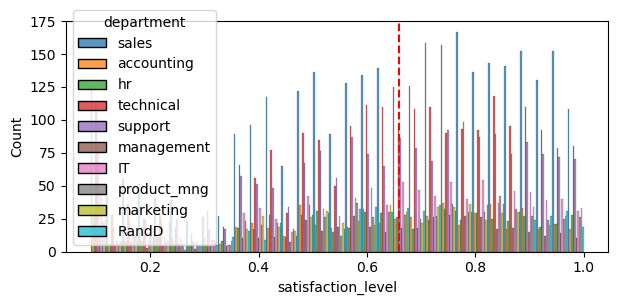

In [43]:
# histogram: satisfaction level by department
plt.figure(figsize=(7,3))
sns.histplot(x=df['satisfaction_level'], hue=df['department'], multiple='dodge')
median = df['satisfaction_level'].median()
plt.axvline(median, color='red', linestyle='--')

In [49]:
# Create a plot as needed
### YOUR CODE HERE ###
df_num.groupby(['department_numbers']).mean()

,satisfaction_level,last_eval_score,projects,avg_monthly_hours,tenure,work_accident,left,promotion_last_5yrs,salary_numbers
department_numbers,,,,,,,,,
0,0.634016,0.715051,3.797131,200.638320,3.350410,0.142418,0.161885,0.002049,1.585041
1,0.627176,0.712983,3.850144,201.291066,3.319885,0.171470,0.122478,0.030259,1.603746
2,0.607939,0.721900,3.834138,200.877617,3.404187,0.140097,0.175523,0.016103,1.624799
3,0.621947,0.715691,3.675541,199.371048,3.256240,0.133111,0.188020,0.018303,1.570715
4,0.631995,0.726307,3.837156,201.529817,3.981651,0.165138,0.119266,0.082569,1.974771
5,0.634770,0.718440,3.720654,199.487370,3.421991,0.160475,0.166419,0.040119,1.631501
6,0.629825,0.713790,3.794461,198.893586,3.341108,0.158892,0.160350,0.000000,1.575802
7,0.631349,0.710398,3.777092,200.242050,3.380673,0.153751,0.169805,0.017907,1.593702
8,0.634822,0.722998,3.820977,200.627128,3.292696,0.164195,0.171334,0.008786,1.593081


In [45]:
df.groupby(['promotion_last_5yrs', 'department']).count()['left']

promotion_last_5yrs  department 
0                    IT              974
                     RandD           673
                     accounting      611
                     hr              590
                     management      400
                     marketing       646
                     product_mng     686
                     sales          3181
                     support        1805
                     technical      2222
1                    IT                2
                     RandD            21
                     accounting       10
                     hr               11
                     management       36
                     marketing        27
                     sales            58
                     support          16
                     technical        22
Name: left, dtype: int64

In [51]:
df_num.groupby(['salary_numbers', 'left']).mean()

satisfaction_level  last_eval_score  projects  \
salary_numbers left                                                  
1              0               0.669457         0.717727  3.785589   
               1               0.440630         0.721567  3.864566   
2              0               0.668077         0.715167  3.786509   
               1               0.439896         0.724551  3.920676   
3              0               0.653832         0.708068  3.794055   
               1               0.437500         0.682708  3.750000   

                     avg_monthly_hours    tenure  work_accident  \
salary_numbers left                                               
1              0            198.668857  3.176084       0.182216   
               1            207.324532  3.878194       0.048552   
2              0            199.016251  3.304096       0.168522   
               1            209.764629  3.890767       0.062419   
3              0            199.919321  3.477707       0.165605   
               1            202.979167  3.812500       0.000000   

                     promotion_last_5yrs  department_numbers  
salary_numbers left                                           
1              0                0.007227            5.890276  
               1                0.004259            6.064736  
2              0                0.026269            5.848842  
               1                0.003901            5.892068  
3              0                0.046709            5.633758  
               1                0.000000            5.729167

## Step 3. Model Building

### Modeling

In [52]:
df_x = df[['salary', 'avg_monthly_hours', 'promotion_last_5yrs', 'left']]
df_y = df[['satisfaction_level']]

X_train, X_test, y_train, y_test = tts(df_x, df_y, test_size = 0.3, random_state = 96)

In [53]:
ols_data = pd.concat([X_train, y_train], axis = 1)

ols_formula = 'satisfaction_level ~ C(salary) + avg_monthly_hours + promotion_last_5yrs + left'

OLS = ols(formula = ols_formula, data = ols_data)
model = OLS.fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     satisfaction_level   R-squared:                       0.121
Model:                            OLS   Adj. R-squared:                  0.121
Method:                 Least Squares   F-statistic:                     231.2
Date:                Wed, 03 Jan 2024   Prob (F-statistic):          5.77e-232
Time:                        19:48:38   Log-Likelihood:                 605.05
No. Observations:                8393   AIC:                            -1198.
Df Residuals:                    8387   BIC:                            -1156.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.6196      0.013     46.486      0.000       0.593       0.646
C(salary)[T.low]        0.0304      0.009      3.262      0.001       0.012       0.049
C(salary)[T.medium]     0.0237      0.009      2.537      0.011       0.005       0.042
avg_monthly_hours       0.0001   5.05e-05      2.185      0.029    1.14e-05       0.000
promotion_last_5yrs     0.0149      0.018      0.825      0.410      -0.021       0.050
left                   -0.2277      0.007    -33.910      0.000      -0.241      -0.215
==============================================================================
Omnibus:                      279.415   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              258.481
Skew:                          -0.380   Prob(JB):                     7.44e-57
Kurtosis:                       2.596   Cond. No.                     1.54e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.54e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""